In [1]:
#|default_exp app

# How To Create a Higging Face Space App

This Notebook creates the files needed to update a HuggingFace Space App

Staps
1. Create Hugging Face Space - this is called demo
2. GIT Clone the space to a local folder
3. Run This Notebook. It imports the model.pkl file and outputs app.py, 3 example jpg files.
4. Download the model.pkl, app.py and example files to the cloned folder
5. Push the files to hugging space

In [2]:
!pip install -Uqq fastai
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


In [3]:
!pip install -q kaleido cohere openai tiktoken gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s 

In [4]:
!pip install -Uqq nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.8 MB/s eta 0:00:00


In [5]:
#nbdev
from nbdev.export import nb_export

# import utilities
import time
import os
import pathlib
import shutil

from pathlib import Path

#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [6]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [7]:
# Change Directory
%cd "/content/drive/MyDrive/Colab Notebooks/FastaiColabNotebooks/Lesson_2/SealClassifier/"

/content/drive/MyDrive/Colab Notebooks/FastaiColabNotebooks/Lesson_2/SealClassifier


In [8]:
#%cd '/content/drive/MyDrive/Colab Notebooks/HuggingFaceProjects/Demo'

In [9]:
#Path to Image Files
HFImgPath = '/content/drive/MyDrive/Colab Notebooks/FastaiCourseData/Lesson_2/seals'


In [10]:
shutil.copy(HFImgPath + '/Odobenidae/Odobenidae-1.jpg', './Odobenidae-1.jpg')
shutil.copy(HFImgPath + '/Phocidae/Phocidae-1.jpg', './Phocidae-1.jpg')
shutil.copy(HFImgPath + '/Otariidae/Otariidae-1.jpg', './Otariidae-1.jpg')

'./Otariidae-1.jpg'

In [11]:
#|export
from fastai.vision.all import *

import gradio as gr

def is_seal(x): return x[0].isuppoer()

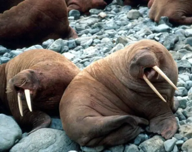

In [12]:
im = PILImage.create('./Odobenidae-1.jpg')
im.thumbnail((192,192))
im

In [13]:
#|export
learn = load_learner('./model.pkl')

In [14]:
learn.predict(im)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('Odobenidae', tensor(0), tensor([1.0000e+00, 1.3851e-06, 1.7722e-06]))

In [15]:
learn.dls.vocab

['Odobenidae', 'Otariidae', 'Phocidae']

In [16]:
#|export
categories = learn.dls.vocab
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [17]:
classify_image(im)

{'Odobenidae': 0.9999967813491821,
 'Otariidae': 1.3850833511241945e-06,
 'Phocidae': 1.772229552443605e-06}

In [18]:
#|export
image = gr.Image(height=192,width=192)
label = gr.Label()
examples = ['./Odobenidae-1.jpg', './Phocidae-1.jpg', './Otariidae-1.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d982e05a052be3e99b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [19]:
# Export Notebook to python Script -- nbdev --
from nbdev.export import nb_export
nb_export('./SealClassifierApp.ipynb', './')